Code to organize data into train/test split

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil

In [168]:
df = pd.read_csv('../csv/ant_size_dataset.csv')
df['mass_mg'] = df['mass']*1000
df.head()

,id,mass,date,id1,id2,object,camera,filename,mass_mg
0,10,0.001,2019-06-27-11,3A11,3A12,ant,DSLR,2019-06-27-11_3A11_3A12_ant_DSLR_CROPPED_0.001...,1.0
1,10,0.001,2019-06-27-11,3A10,3A38,ant,DSLR,2019-06-27-11_3A10_3A38_ant_DSLR_CROPPED_0.001...,1.0
2,10,0.001,2019-06-27-11,3A11,3A21,ant,DSLR,2019-06-27-11_3A11_3A21_ant_DSLR_CROPPED_0.001...,1.0
3,10,0.001,2019-06-27-11,3A11,3A46,ant,DSLR,2019-06-27-11_3A11_3A46_ant_DSLR_CROPPED_0.001...,1.0
4,10,0.001,2019-06-27-11,3A11,3A29,ant,DSLR,2019-06-27-11_3A11_3A29_ant_DSLR_CROPPED_0.001...,1.0


/var/folders/jt/lslf8gvn015gpvtk775yzz7h0000gn/T/ipykernel_4310/1881589808.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


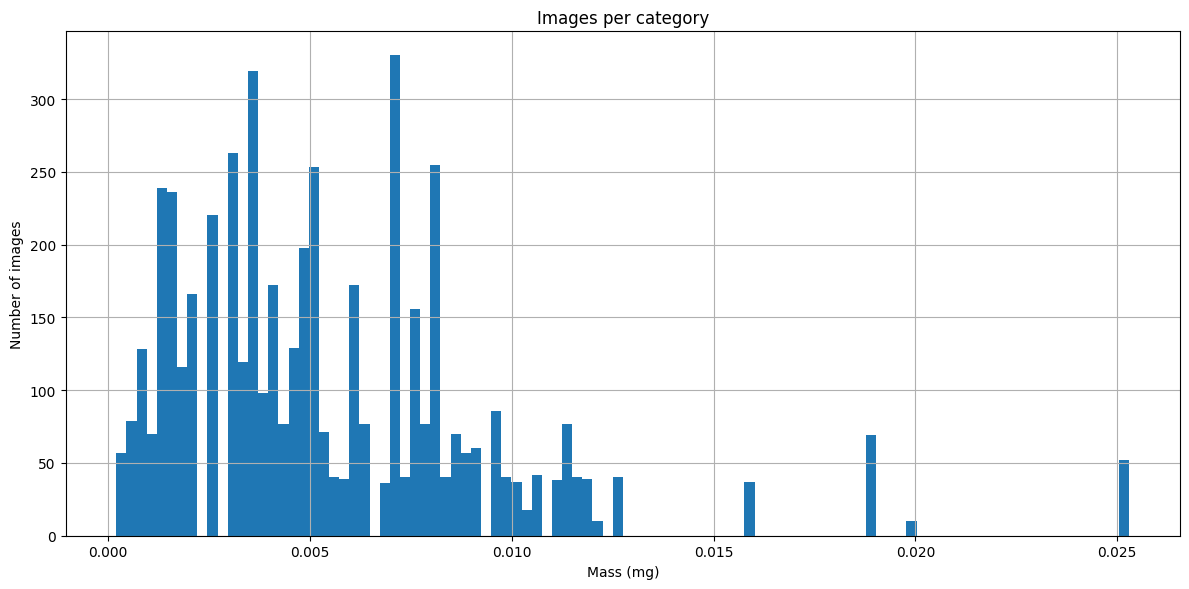

In [169]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
plt.hist(df['mass'], bins=100)#, bins = range(0, 30, 1))
plt.xlabel('Mass (mg)')
plt.ylabel('Number of images')
plt.title('Images per category')
plt.grid(b=None)
plt.tight_layout()
plt.tick_params(axis='x', which='both', bottom=True, top=False)
plt.tick_params(axis='y', which='both', right=False, left=True)
plt.show()

In [170]:
# organize mass into bins
bins = [0, 2, 5, 10, 15, 60]
df['binned'] = pd.cut(df['mass_mg'], bins)


In [171]:
# rename category naumes
df['cat'] = df['binned'].astype('category')
df['cat'] = df['binned'].cat.rename_categories([0, 1 ,2, 3, 4])

In [172]:
# check if sorted correctly (should only show one category)
category1 = df['binned'].unique()[0]
df.loc[df.binned == category1]['cat'].unique()

[0]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [173]:
# randomly select 10% across bins for test set
samples = []
for group in df.binned.unique():
    s = df.loc[df.binned== group].sample(frac=0.1).reset_index(drop=True)
    samples.append(s)
    
test = pd.concat(samples, axis=0)

In [174]:
# remove test set from training set
train = df[~df.filename.isin(test.filename)]

In [175]:
print('Test set has ' + str(len(test)) + ' images') 
print('Train set has ' + str(len(train)) + ' images')

Test set has 510 images
Train set has 4584 images


In [189]:
510+4584

5094

In [176]:
test_strs = [str(x) for x in test.cat] 
train_strs = [str(x) for x in train.cat]

/var/folders/jt/lslf8gvn015gpvtk775yzz7h0000gn/T/ipykernel_4310/2914089241.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


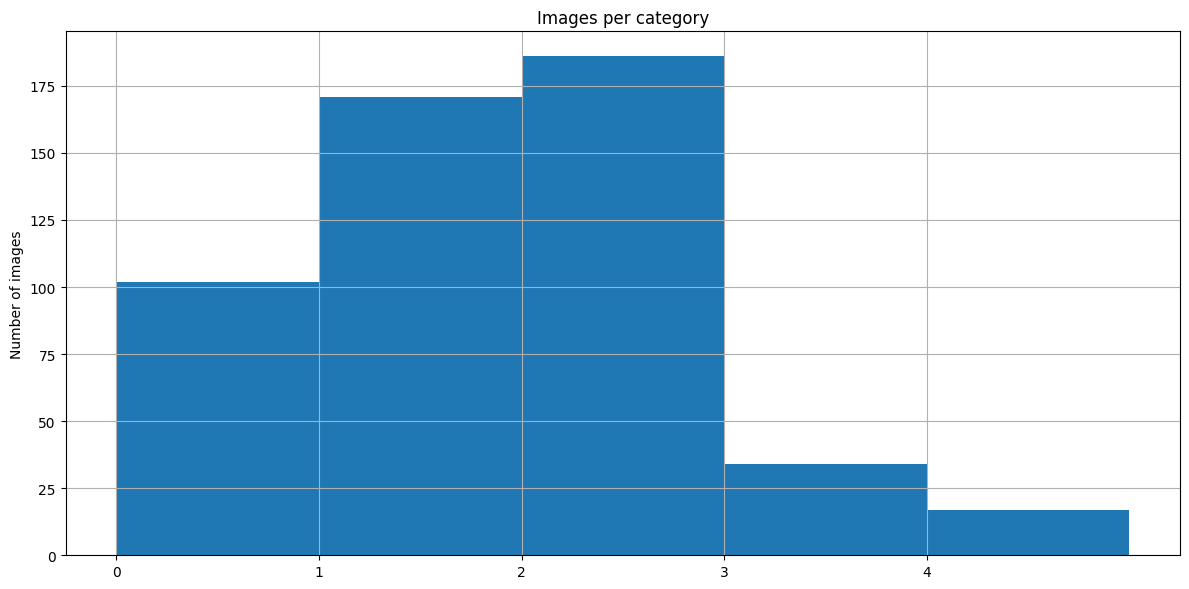

In [158]:
# look at test set distribution
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
plt.hist(test_strs, bins=range(0,6))
plt.ylabel('Number of images')
plt.title('Images per category')
plt.grid(b=None)
plt.tight_layout()
#plt.tick_params(axis='x', which='both', bottom=True, top=False)
#plt.tick_params(axis='y', which='both', right=False, left=True)
plt.show()

/var/folders/jt/lslf8gvn015gpvtk775yzz7h0000gn/T/ipykernel_4310/1517324351.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


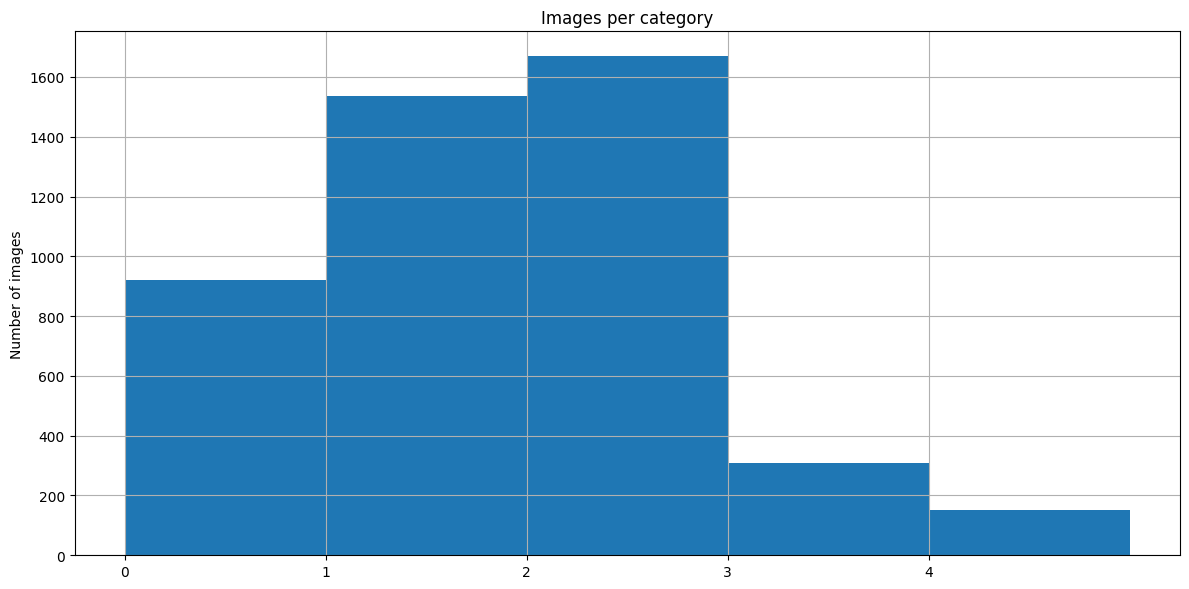

In [159]:
# look at test set distribution
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
plt.hist(train_strs, bins=range(0,6))
plt.ylabel('Number of images')
plt.title('Images per category')
plt.grid(b=None)
plt.tight_layout()
#plt.tick_params(axis='x', which='both', bottom=True, top=False)
#plt.tick_params(axis='y', which='both', right=False, left=True)
plt.show()

In [210]:
test_folder = '/Users/nsi/Documents/ant-size/data/test'
train_folder = '/Users/nsi/Documents/ant-size/data/train'
num_files = 0
for root, dirs, files in os.walk('/Users/nsi/Documents/ant-size/single_animal'):   
    for file in files:
        if file.endswith('.JPG'):
            num_files += 1
            if (test['filename'].eq(file)).any():
                shutil.copy(os.path.join(root, file), test_folder)
            else:
                shutil.copy(os.path.join(root, file), train_folder)

print(num_files)

5094


In [198]:
# 5092 files moved but 5094 in dataframe...
file_list = []
for root, dirs, files in os.walk('/Users/nsi/Documents/ant-size/single_animal'):   
    for file in files:
        if file.endswith('.JPG'):
            file_list.append(file)

In [209]:
print(df[~df['filename'].isin(file_list)].filename)

2365    2019-06-28-18_3A54_3A29_ant_C920_CROPPED_0.005...
2367    2019-06-28-18_3A54_3A37_ant_C920_CROPPED_0.005...
Name: filename, dtype: object


In [202]:
for f in file_list:
    if not df['filename'].isin(file):
        print(file)

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [178]:
train.to_csv('../data/train_ant_size.csv', index_label = False)
test.to_csv('../data/test_ant_size.csv', index_label = False)